## Imports

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

## Helper Functions

In [39]:
# Function to plot graphs titles and labels 
def info_plot(title, xlabel, ylabel):
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

# Function to plot values upside the barplot
def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [16, 10]
    plt.rcParams['font.size'] = 18
    
    dusplay(HTML('<style>.container {width:100% !important;}</style'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings

<function __main__.jupyter_settings()>

## Load Datasets

In [18]:
df_houses = pd.read_csv('../data/df_houses_full_cleanned.csv')
df_venues = pd.read_csv('../data/nearby_venues_full_cleanned.csv')

# 1.0 Exploratory Data Analyse - EDA

## 1.1 df_houses

In [19]:
print(f'The dataset "df_houses" has {df_houses.shape[0]} rows and {df_houses.shape[1]} columns.')

The dataset "df_houses" has 1670 rows and 10 columns.


In [20]:
df_houses.dtypes

house_id             int64
scrapy_datetime     object
city                object
street              object
size               float64
pets                object
montly_rent          int64
deposit_value        int64
lat                float64
long               float64
dtype: object

In [21]:
df_houses['scrapy_datetime'] = pd.to_datetime(df_houses['scrapy_datetime'])

In [25]:
df_houses.describe(include = 'all').T

<ipython-input-25-18e255f7c438>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_houses.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
house_id,1670.0,NaN,NaN,NaN,NaT,NaT,1654843.155689,117069.471715,7022.0,1650309.25,1692095.0,1714294.25,1724698.0
scrapy_datetime,1670,1670,2021-05-13 12:27:20,1,2021-05-13 12:16:03,2021-05-13 13:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1670,11,Berlin,600,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1670,681,Wielandstraße,91,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,1670.0,NaN,NaN,NaN,NaT,NaT,56.083191,138.955278,15.0,33.0,47.0,63.75,4000.0
pets,1670,3,Pets not allowed,1101,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
montly_rent,1670.0,NaN,NaN,NaN,NaT,NaT,1587.674251,787.381348,350.0,1050.0,1400.0,1860.0,6490.0
deposit_value,1670.0,NaN,NaN,NaN,NaT,NaT,1612.657485,1284.200416,0.0,690.0,1500.0,2250.0,9990.0
lat,1670.0,NaN,NaN,NaN,NaT,NaT,51.329168,1.685677,48.03293,50.11106,51.934285,52.52614,53.70151
long,1670.0,NaN,NaN,NaN,NaT,NaT,10.664829,2.377109,6.72161,8.68874,10.02364,13.36026,13.6184


In [28]:
# Pandas Profile Report
df_houses_report = ProfileReport(df_houses, 'Houses for Rent in Germany.')

# Saving the report to further use.
df_houses_report.to_file(output_file = '../reports/df_houses_report.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
df_houses_report

### 1.1.1 Univariated Analysis

#### City

C:\Users\felip\Anaconda3\envs\PA05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


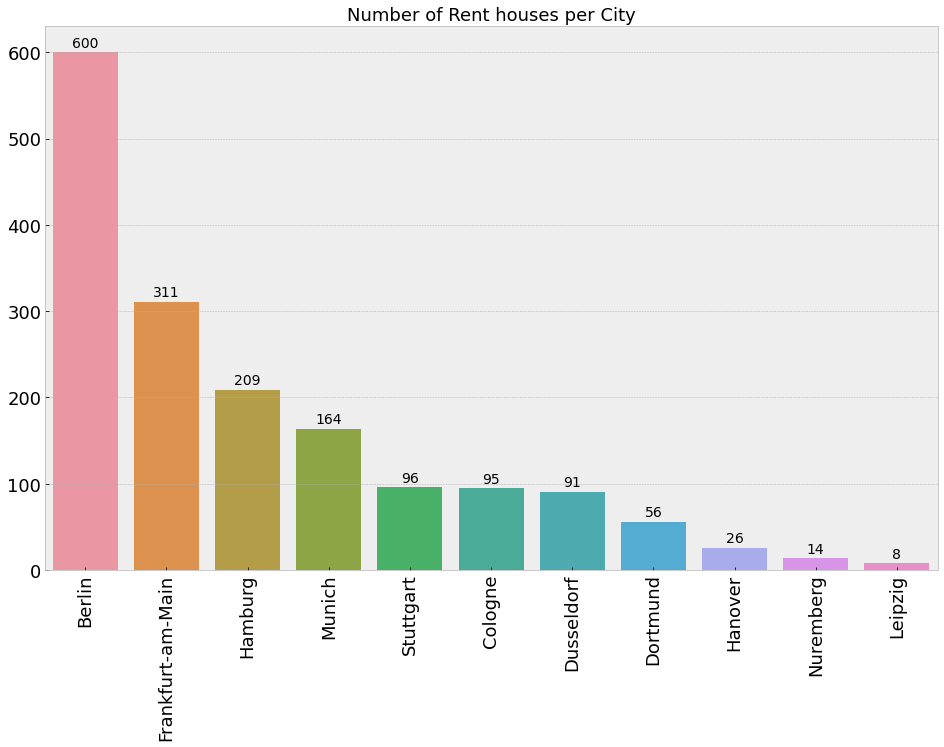

In [59]:
# count plot - number of rent houses offer per city.
ax = sns.barplot(df_houses['city'].value_counts().keys(), y = df_houses['city'].value_counts().values)
plt.title('Number of Rent houses per City', fontsize = 18)
plt.xticks(rotation=90)
annot_plot(ax)

### 1.1.2 Bivariate Analysis